<a href="https://colab.research.google.com/github/SawsanYusuf/Big_Cities_Health_Data_Inventory/blob/main/Big_Cities_Health_Data_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Cities Health Data Inventory**

#About the Data:

This dataset illustrates health status of 26 of the nation’s largest and most urban cities as captured by 34 health (and six demographics-related) indicators. 

These indicators represent some of the leading causes of morbidity and mortality in the United States and leading priorities of national, state, and local health agencies.

Public health data were captured in nine overarching categories: HIV/AIDS, cancer, nutrition/physical activity/obesity, food safety, infectious disease, maternal and child health, tobacco, injury/violence, and behavioral health/substance abuse.

Attribution: U.S. Centers for Disease Control and Prevention

Source: Big Cities Health Inventory Data

In [1]:
#import libraries
import io
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

#Prepare Data

###1.Import The Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Big_Cities_Health_Data_Inventory.csv to Big_Cities_Health_Data_Inventory.csv


In [3]:
#read the csv file 
df = pd.read_csv(io.BytesIO(uploaded["Big_Cities_Health_Data_Inventory.csv"]))
df.head()

,Indicator Category,Indicator,Year,Gender,Race/ Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes
0,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2013,Both,All,30.4,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
1,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2012,Both,All,39.6,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
2,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2011,Both,All,41.7,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
3,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Male,All,195.8,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN
4,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Female,All,135.5,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN


##2. Explore

###2.1. Basics

In [4]:
#Basic Information
print(df.shape)
df.info()

(13512, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Indicator Category          13512 non-null  object 
 1   Indicator                   13512 non-null  object 
 2   Year                        13512 non-null  object 
 3   Gender                      13512 non-null  object 
 4   Race/ Ethnicity             13512 non-null  object 
 5   Value                       13499 non-null  float64
 6   Place                       13512 non-null  object 
 7   BCHC Requested Methodology  13004 non-null  object 
 8   Source                      11222 non-null  object 
 9   Methods                     4232 non-null   object 
 10  Notes                       3541 non-null   object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [5]:
#Data Types and Type Conversion
print(pd.value_counts(df.dtypes))
df.dtypes

object     10
float64     1
dtype: int64


Indicator Category             object
Indicator                      object
Year                           object
Gender                         object
Race/ Ethnicity                object
Value                         float64
Place                          object
BCHC Requested Methodology     object
Source                         object
Methods                        object
Notes                          object
dtype: object

In [6]:
#Preview Columns names
df.columns

Index(['Indicator Category', 'Indicator', 'Year', 'Gender', 'Race/ Ethnicity',
       'Value', 'Place', 'BCHC Requested Methodology', 'Source', 'Methods',
       'Notes'],
      dtype='object')

In [7]:
#make column names consistently accessible
#Extract columns 
cols = df.columns 
#Create empty list 
new_cols = [] 
#iterate to fix issues with names 
for column in cols: 
  #to proper case 
  proper_cols = column.title() 
  #replace space/hyphen with underscore 
  proper_cols_hyphen = proper_cols.replace(" ", "_") 
  clean_col = proper_cols_hyphen.replace("-", "_") 
  #append to empty list 
  new_cols.append(clean_col) 

#replace existing columns in dataframe with new
df.columns = new_cols 
#preview 
df.head()

,Indicator_Category,Indicator,Year,Gender,Race/_Ethnicity,Value,Place,Bchc_Requested_Methodology,Source,Methods,Notes
0,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2013,Both,All,30.4,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
1,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2012,Both,All,39.6,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
2,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2011,Both,All,41.7,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
3,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Male,All,195.8,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN
4,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Female,All,135.5,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN


In [8]:
df.rename(columns = {'Race/_Ethnicity':'Race_Ethnicity'}, inplace = True)
df.head()

,Indicator_Category,Indicator,Year,Gender,Race_Ethnicity,Value,Place,Bchc_Requested_Methodology,Source,Methods,Notes
0,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2013,Both,All,30.4,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
1,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2012,Both,All,39.6,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
2,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2011,Both,All,41.7,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
3,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Male,All,195.8,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN
4,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Female,All,135.5,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN


In [9]:
# Describe non-numerical features 
df.select_dtypes(exclude="number").head()

,Indicator_Category,Indicator,Year,Gender,Race_Ethnicity,Place,Bchc_Requested_Methodology,Source,Methods,Notes
0,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2013,Both,All,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
1,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2012,Both,All,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
2,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2011,Both,All,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
3,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Male,All,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN
4,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Female,All,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN


In [10]:
df.describe(exclude="number")

,Indicator_Category,Indicator,Year,Gender,Race_Ethnicity,Place,Bchc_Requested_Methodology,Source,Methods,Notes
count,13512,13512,13512,13512,13512,13512,13004,11222,4232,3541
unique,11,44,13,3,9,29,114,306,167,125
top,HIV/AIDS,"Persons Living with HIV/AIDS Rate (Per 100,000...",2012,Both,All,"Phoenix, AZ","2012, 2013, 2014: per 100,000 population using...",Source: California Electronic Death Registrati...,Population denominators based on extrapolation...,Deaths for which cause was listed as “deferred...
freq,2177,623,3950,9409,5757,772,734,386,233,381


In [11]:
#For each numerical features compute number of unique entries 
unique_vals = df.select_dtypes(include="number").nunique().sort_values()
unique_vals

Value    2677
dtype: int64

###2.2. Missing Value

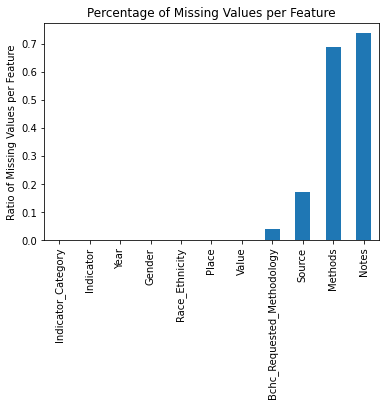

In [12]:
# Missing values per feature
df.isnull().mean().sort_values().plot(
    kind = "bar",
    ylabel = "Ratio of Missing Values per Feature",
    title = "Percentage of Missing Values per Feature"
);

In [ ]:
#Percentage of Missing Values
df.isnull().sum() / len(df)

Indicator_Category            0.000000
Indicator                     0.000000
Year                          0.000000
Gender                        0.000000
Race_Ethnicity                0.000000
Value                         0.000962
Place                         0.000000
Bchc_Requested_Methodology    0.037596
Source                        0.169479
Methods                       0.686797
Notes                         0.737937
dtype: float64

In [13]:
#Drop columns with more than 50% missing values
df.drop(columns = ["Methods","Notes"], inplace=True)

In [14]:
#replace the missing 'Source' values by the most frequent 
Source_most=df['Source'].value_counts().idxmax()
Source_most

'Source: California Electronic Death Registration System (CA-EDRS), as of April 1, 2016.  Includes immediate cause of death and contributing causes of death.   Includes records for which Long Beach was recorded on the death certificate as the decedent’s city of residence.  Duplicate records due to revisions to the death certificate are not included.  ICD-10 codes were not included in the dataset; algorithms were written to match key words from cause of death to the corresponding ICD-10 diagnosis.'

In [15]:
#replace the missing 'Source' values by the most frequent 
df["Source"].replace(np.nan, Source_most, inplace=True)

In [16]:
#replace the missing 'Bchc_Requested_Methodology' values by the most frequent 
Bchc_Requested_Methodology_most = df['Bchc_Requested_Methodology'].value_counts().idxmax()
Bchc_Requested_Methodology_most

'2012, 2013, 2014: per 100,000 population using 2010 US Census figures. Please specify population/source/ methodology - this is an area where data sources vary greatly. If 2012-2014 not available, provide three most recent years of data'

In [17]:
#replace the missing 'Bchc_Requested_Methodology' values by the most frequent 
df["Bchc_Requested_Methodology"].replace(np.nan, Bchc_Requested_Methodology_most, inplace=True)

In [18]:
df["Value"]. describe().apply("{0:,.0f}".format)

count    13,499
mean        286
std       3,193
min           0
25%           7
50%          16
75%          45
max      80,977
Name: Value, dtype: object

In [19]:
df.drop(columns= "Value", inplace=True)

In [20]:
df.isnull().sum() / len(df)

Indicator_Category            0.0
Indicator                     0.0
Year                          0.0
Gender                        0.0
Race_Ethnicity                0.0
Place                         0.0
Bchc_Requested_Methodology    0.0
Source                        0.0
dtype: float64

In [21]:
df.shape

(13512, 8)

###2.3. Duplicates

In [22]:
#Duplicates
df.duplicated().sum()

9

In [23]:
df.drop_duplicates(inplace = True)
df.shape

(13503, 8)

###2.4. Using Bar-plots to See The Distribution of The Categorical Data

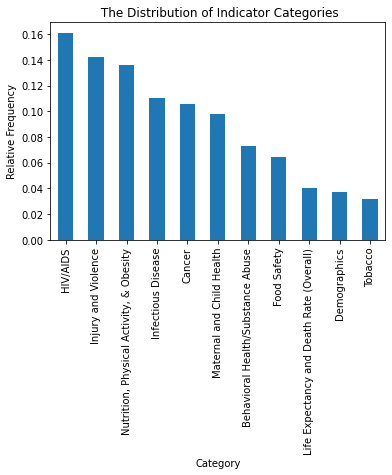

In [24]:
df["Indicator_Category"].value_counts(normalize=True).plot(
  kind="bar", xlabel="Category", ylabel="Relative Frequency", title=" The Distribution of Indicator Categories");

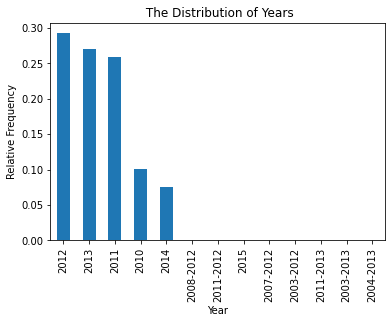

In [25]:
df["Year"].value_counts(normalize=True).plot(
  kind="bar",xlabel="Year", ylabel="Relative Frequency", title=" The Distribution of Years");

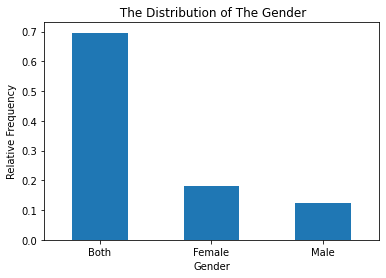

In [26]:
df["Gender"].value_counts(normalize=True).plot(
  kind="bar", rot=0, xlabel="Gender", ylabel="Relative Frequency", title=" The Distribution of The Gender");

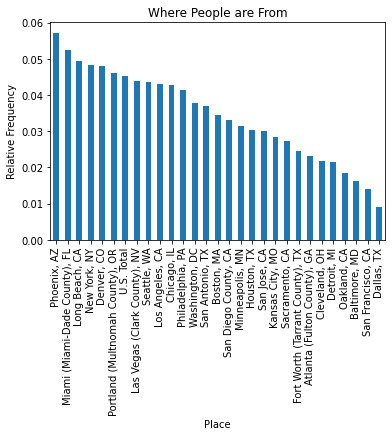

In [27]:
df["Place"].value_counts(normalize=True).plot(
  kind="bar", xlabel="Place", ylabel="Relative Frequency", title="Where People are From");

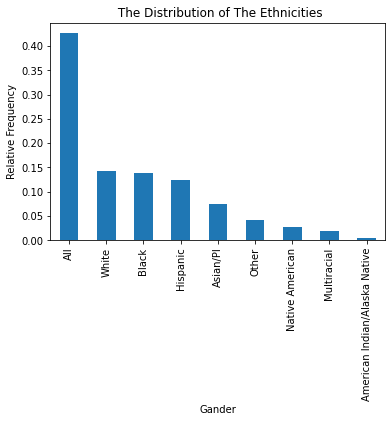

In [28]:
df["Race_Ethnicity"].value_counts(normalize=True).plot(
  kind="bar", xlabel="Gander", ylabel="Relative Frequency", title=" The Distribution of The Ethnicities");

In [29]:
df["Source"].value_counts(normalize=True)

Source: California Electronic Death Registration System (CA-EDRS), as of April 1, 2016.  Includes immediate cause of death and contributing causes of death.   Includes records for which Long Beach was recorded on the death certificate as the decedent’s city of residence.  Duplicate records due to revisions to the death certificate are not included.  ICD-10 codes were not included in the dataset; algorithms were written to match key words from cause of death to the corresponding ICD-10 diagnosis.    0.198030
Minnesota Department of Health, Vital Records                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
df["Bchc_Requested_Methodology"].value_counts(normalize=True)

2012, 2013, 2014: per 100,000 population using 2010 US Census figures. Please specify population/source/ methodology - this is an area where data sources vary greatly. If 2012-2014 not available, provide three most recent years of data           0.091906
HIV cases diagnosed in 2012, 2013, 20014 (as available); report crude rate per 100,000 pop using 2010 US Census figures. If 2012-2014 not available, provide three most recent years of data                                                          0.039991
2012, 2013, 2014; per 100,000 population using 2010 US Census figures, age adjusted to the year 2000 standard population. If 2012-2014 not available, provide three most recent years of data. Suggested ICD-10 codes: C00-C97                        0.038140
2012, 2013, 2014; per 100,000 population using 2010 US Census figures, age adjusted to the year 2000 standard population. If 2012-2014 not available, provide three most recent years of data. Suggested ICD-10 codes: I00-I109, I11, I13, 

###2.5. Dealing with The Distributions

In [30]:
mask_Race_Ethnicity = df["Race_Ethnicity"] != "American Indian/Alaska Native"
df = df[mask_Race_Ethnicity]

In [32]:
mask_year_2015 = df["Year"] != "2015"
df = df[mask_year_2015]

In [31]:
mask_year_1 = df["Year"] != "2008-2012" 
df = df[mask_year_1]

In [33]:
mask_year_2 = df["Year"] != "2011-2012"
df = df[mask_year_2]

In [34]:
mask_year_3 = df["Year"] != "2007-2012"
df = df[mask_year_3]
mask_year_4 = df["Year"] != "2003-2012"
df = df[mask_year_4]
mask_year_5 = df["Year"] != "2011-2013"
df = df[mask_year_5]
mask_year_6 = df["Year"] != "2003-2013"
df = df[mask_year_6]
mask_year_7 = df["Year"] != "2004-2013"
df = df[mask_year_7]

In [35]:
df["Year"].value_counts()

2012    3938
2013    3624
2011    3489
2010    1355
2014    1012
Name: Year, dtype: int64

In [36]:
df["Race_Ethnicity"].value_counts()

All                5736
White              1912
Black              1867
Hispanic           1686
Asian/PI           1011
Other               565
Native American     371
Multiracial         270
Name: Race_Ethnicity, dtype: int64

In [37]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13418 entries, 0 to 13511
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Indicator_Category          13418 non-null  object
 1   Indicator                   13418 non-null  object
 2   Year                        13418 non-null  object
 3   Gender                      13418 non-null  object
 4   Race_Ethnicity              13418 non-null  object
 5   Place                       13418 non-null  object
 6   Bchc_Requested_Methodology  13418 non-null  object
 7   Source                      13418 non-null  object
dtypes: object(8)
memory usage: 943.5+ KB
(13418, 8)


###2.6. The Relationship between The variables and The Indicator Categories

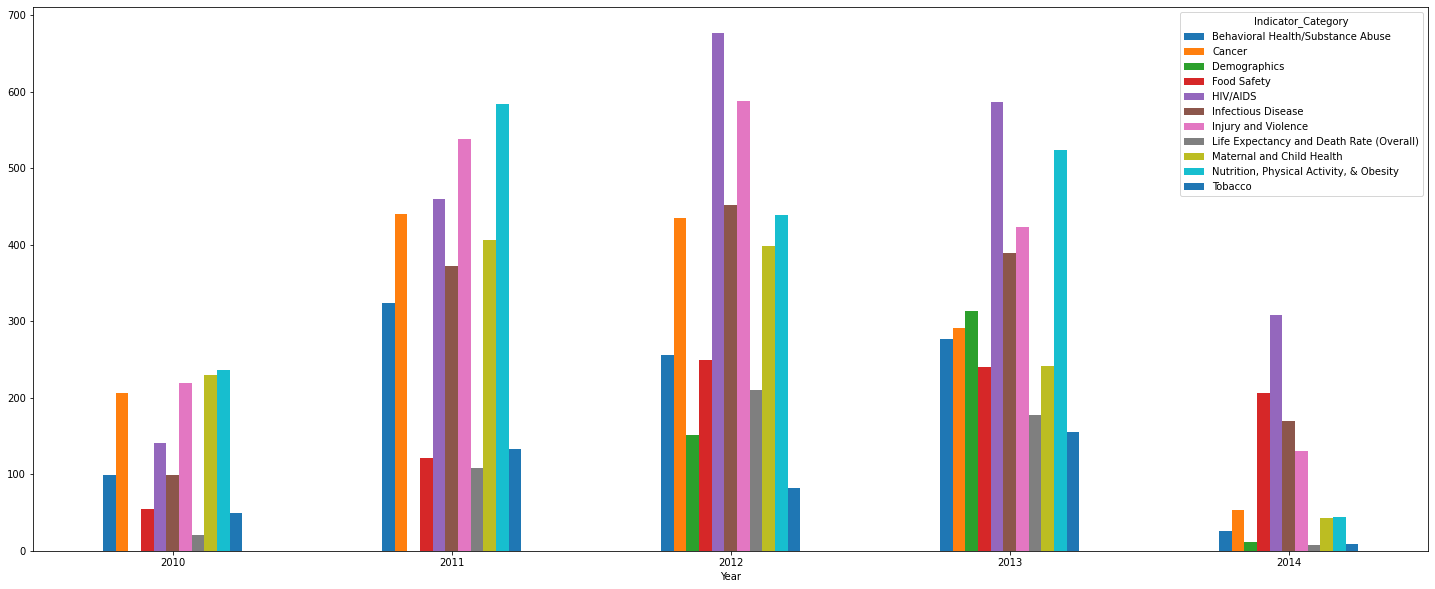

In [38]:
#Cross tabulation between 'Year' and 'Indicator_Category'
CrosstabResult=pd.crosstab(index=df['Year'], columns=df['Indicator_Category'])
#print(CrosstabResult)
 
#Grouped bar chart between 'Year' and 'Indicator_Category'
CrosstabResult.plot.bar(figsize=(25, 10), rot=0);

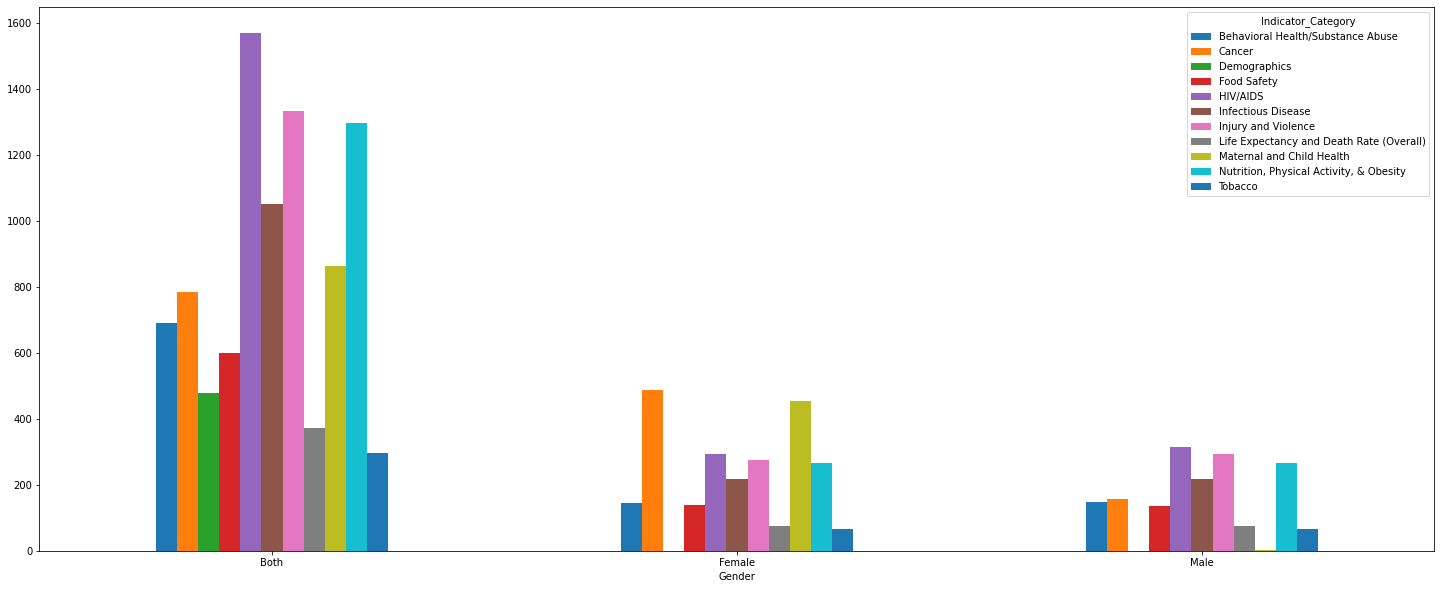

In [39]:
#Cross tabulation between 'Gender' and 'Indicator_Category'
CrosstabResult=pd.crosstab(index=df['Gender'], columns=df['Indicator_Category'])
#print(CrosstabResult)

#Grouped bar chart between 'Gender' and 'Indicator_Category'
CrosstabResult.plot.bar(figsize=(25, 10), rot=0);

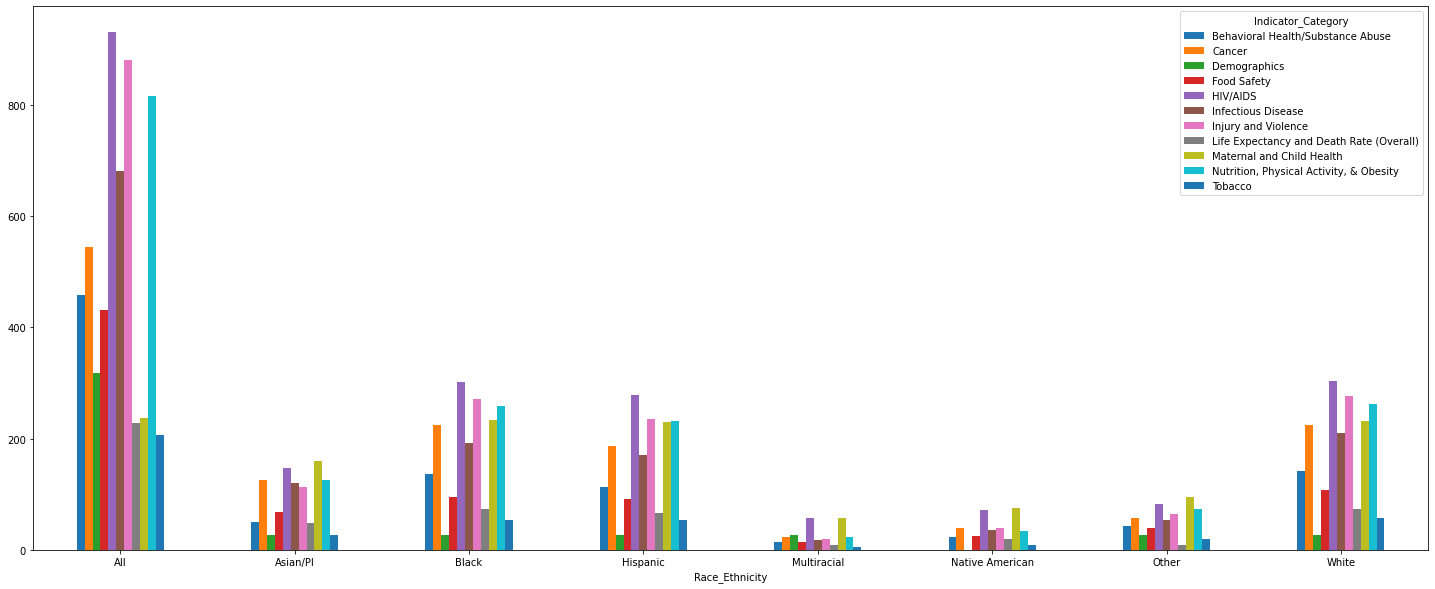

In [40]:
#Cross tabulation between 'Race_Ethnicity' and 'Indicator_Category'
CrosstabResult=pd.crosstab(index=df['Race_Ethnicity'], columns=df['Indicator_Category'])
#print(CrosstabResult)

#Grouped bar chart between 'Race_Ethnicity' and 'Indicator_Category'
CrosstabResult.plot.bar(figsize=(25, 10), rot=0);

In [41]:
df_Place = pd.pivot_table(df, index='Place', columns='Indicator_Category',
                          aggfunc='count')
#view pivot table
df_Place

Bchc_Requested_Methodology         \
Indicator_Category              Behavioral Health/Substance Abuse Cancer   
Place                                                                      
Atlanta (Fulton County), GA                                  32.0   39.0   
Baltimore, MD                                                19.0    1.0   
Boston, MA                                                   68.0   54.0   
Chicago, IL                                                  28.0   76.0   
Cleveland, OH                                                35.0    NaN   
Dallas, TX                                                    NaN    NaN   
Denver, CO                                                   38.0   66.0   
Detroit, MI                                                  34.0   39.0   
Fort Worth (Tarrant County), TX                               4.0   49.0   
Houston, TX                                                  31.0   58.0   
Kansas City, MO                                              15.0   45.0   
Las Vegas (Clark County), NV                                 68.0   57.0   
Long Beach, CA                                               24.0   84.0   
Los Angeles, CA                                              27.0   57.0   
Miami (Miami-Dade County), FL                                47.0   80.0   
Minneapolis, MN                                              21.0   53.0   
New York, NY                                                 76.0   57.0   
Oakland, CA                                                   9.0   21.0   
Philadelphia, PA                                             77.0   47.0   
Phoenix, AZ                                                  68.0  108.0   
Portland (Multnomah County), OR                               NaN   66.0   
Sacramento, CA                                                NaN   45.0   
San Antonio, TX                                              44.0   57.0   
San Diego County, CA                                         63.0   60.0   
San Francisco, CA                                            14.0    NaN   
San Jose, CA                                                  8.0   42.0   
Seattle, WA                                                  51.0   52.0   
U.S. Total                                                   60.0   66.0   
Washington, DC                                               21.0   48.0   

                                                                   \
Indicator_Category              Demographics Food Safety HIV/AIDS   
Place                                                               
Atlanta (Fulton County), GA             18.0         NaN     31.0   
Baltimore, MD                           18.0        15.0     60.0   
Boston, MA                              18.0         NaN     56.0   
Chicago, IL                             18.0        24.0     84.0   
Cleveland, OH                           12.0        69.0     29.0   
Dallas, TX                              12.0        48.0     42.0   
Denver, CO                              12.0        46.0     94.0   
Detroit, MI                             14.0         NaN     82.0   
Fort Worth (Tarrant County), TX         14.0        26.0     32.0   
Houston, TX                             18.0        18.0     81.0   
Kansas City, MO                         18.0        24.0     77.0   
Las Vegas (Clark County), NV            14.0        45.0     92.0   
Long Beach, CA                           NaN        64.0    124.0   
Los Angeles, CA                         18.0        42.0     89.0   
Miami (Miami-Dade County), FL           14.0        45.0    120.0   
Minneapolis, MN                         18.0         NaN     79.0   
New York, NY                            18.0        18.0     99.0   
Oakland, CA                             18.0         NaN     79.0   
Philadelphia, PA                        18.0        49.0     53.0   
Phoenix, AZ                             18.0        54.0     80.0   
Portland (Multnomah